Na początek pobawimy się plikami (znajdziemy je na dysku itp.), potrzebujemy do tego modułu `os`:

In [1]:
import os

Aby sprawdzić w jakim jesteśmy folderze:

In [2]:
os.getcwd()

'C:\\proj\\EEG01\\zajecia_02'

Możemy wynik tej operacji zapisać w zmiennej:

In [3]:
obecny_folder = os.getcwd()

Teraz mamy napis w zmiennej `obecny_folder`:

In [4]:
obecny_folder

'C:\\proj\\EEG01\\zajecia_02'

### Dlaczego `\\`?
Zauważcie, że w powyższym napisie mamy podwójne ukośniki `\\`. Dzieje się tak dlatego, że domyślnie pojedynczy ukośnik `\` znaczy tylko tyle, że następny znak ma specjalne znaczenie. Np. `\n` to tyle co enter tzn. przejście do następnej linijki:

In [7]:
print('abcd\nefgh')

abcd
efgh


Podwójne ukośniki są więc po to, aby następny znak nie był traktowany specjalnie, ale aby pojawił się ukośnik, po prostu. Porównaj:

In [10]:
print('\\tablice')
print('\tablica')

\tablice
	ablica


W drugim przypadku `\t` jest interpretowane jako tab.

### Z powrotem do świata folderów

Możecie sprawdzać jakiego typu jest zmienna korzystając z funkcji `type`:

In [5]:
type(obecny_folder)

str

`str` znaczy string - od *character string* czyli sekwencja znaków. Tzn. mamy zmienną tekstową.

Zwykle chcemy nie tyle wiedzieć w jakim jesteśmy folderze, ale przejść do folderu, w którym są dane. 
W notebook'u możemy to zrobić używając komendy `cd`. W normalnym pythonie musielibyście używać `os.chdir` tzn. funkcji `chdir` modułu `os`. Ale `cd` jest wygodniejsze, więc będziemy teraz korzystać z `cd`.
Powiedzmy że nasze dane są w folderze `C:\Users\swps\Dropbox\CURRENT PROJECTS\Decyzyjne Diamenty\WYCZYSZCZONE DANE`, przechodzimy do niego tak:

In [11]:
cd C:\Users\swps\Dropbox\CURRENT PROJECTS\Decyzyjne Diamenty\WYCZYSZCZONE DANE

C:\Users\swps\Dropbox\CURRENT PROJECTS\Decyzyjne Diamenty\WYCZYSZCZONE DANE


Teraz jesteśmy w środku tego folderu. 
**Zadanie**: upewnij się, że jesteś w folderze, korzystając z funkcji `getcwd`:

In [12]:
# tutaj wpisz kod
# BTW tekst poprzedzony krzyżykiem (taki jak ten) jest traktowany jako komentarz
# komentarze nie są interpretowane przez python'a - komentarze są tylko dla ludzi,
# którzy czytają kod

Skoro jesteśmy już w dobrym folderze chcemy zajrzeć jakie są w nim pliki. Skorzystamy do tego z funkcji `listdir` (od *list directory*), którą znajdziemy w module `os`:

In [13]:
os.listdir()

['D10_1.fdt',
 'D10_1.set',
 'D14_1.fdt',
 'D14_1.set',
 'D14_2.fdt',
 'D14_2.set',
 'D16_1.fdt',
 'D16_1.set',
 'D16_2.fdt',
 'D16_2.set',
 'D17_1.fdt',
 'D17_1.set',
 'D17_2.fdt',
 'D17_2.set',
 'D18_1.fdt',
 'D18_1.set',
 'D18_2.fdt',
 'D18_2.set',
 'D19_1.fdt',
 'D19_1.set',
 'D19_2.fdt',
 'D19_2.set',
 'D1_1.fdt',
 'D1_1.set',
 'D1_2.fdt',
 'D1_2.set',
 'D20_1.fdt',
 'D20_1.set',
 'D20_2.fdt',
 'D20_2.set',
 'D21_1.fdt',
 'D21_1.set',
 'D21_2.fdt',
 'D21_2.set',
 'D21_3.fdt',
 'D21_3.set',
 'D21_4.fdt',
 'D21_4.set',
 'D22_1.fdt',
 'D22_1.set',
 'D22_2.fdt',
 'D22_2.set',
 'D23_1.fdt',
 'D23_1.set',
 'D23_2.fdt',
 'D23_2.set',
 'D24_1.fdt',
 'D24_1.set',
 'D24_2.fdt',
 'D24_2.set',
 'D2_1.fdt',
 'D2_1.set',
 'D2_2.fdt',
 'D2_2.set',
 'D3_1.fdt',
 'D3_1.set',
 'D3_2.fdt',
 'D3_2.set',
 'D5_1.fdt',
 'D5_1.set',
 'D5_2.fdt',
 'D5_2.set',
 'D8_1.fdt',
 'D8_1.set',
 'D8_2.fdt',
 'D8_2.set',
 'D9_1.fdt',
 'D9_1.set',
 'D9_2.fdt',
 'D9_2.set']

Wyskoczyło sporo plików (Wam wyskoczy mniej bo ściągniecie tylko kilka). 
Zauważcie, że pliki mają rozszerzenia `.set` oraz `.fdt`. Są to pliki w formacie, 
z jakiego korzysta eeglab. My korzystamy z `mne-python'a`, ale potrafi on wczytywać pliki
w wielu formatach, między innymi eeglabowym.
W pliku `.set` mamy tzw. meta-informacje (nazwy i pozycja kanałów, częstotliwość próbkowania,
wydarzenia w sygnale takie jak prezentacja bodźca), sam sygnał jest przechowywany w pliku `.fdt`.
Aby wczytać plik będziemy potrzebowali tylko nazwy pliku `.set` - funkcja z której będziemy korzystać
sama znajdzie plik `.fdt` i wczyta sygnał.
Zanim skorzystamy z tej funkcji nauczymy się wczytywać z folderu tylko nazwy plików o danym
rozszerzeniu (`.set`), a następnie dowiemy się jak działają listy.

### Selektywne wczytywanie nazw plików
Aby wczytać nazwy plików z konkretnym rozszerzeniem skorzystamy z modułu `glob`.  
W module `glob` znajduje się funkcja `glob`, która nam w tym pomoże.
Normalnie importowalibyśmy moduł `glob` i korzystali z jego funkcji o tej samej nazwie tak:
```python
import glob

glob.glob(tutaj_jakieś_argumenty)
```
Ale chcemy nauczyć się importować funkcję bezpośrednio z pakietu tzn. chcemy na raz wyciągnąć z pakietu `glob` tylko funkcję `glob`. Robimy to korzystając ze zwrotu:
```
from MMM import FFF
```
gdzie w miejsce `MMM` wpisujemy nazwę modułu/biblioteki a w miejsce `FFF` - nazwę funkcji:
```python
from glob import glob

# teraz możemy pisać tak:
glob(tutaj_jakieś_argumenty)
```
Tak więc importujemy:

In [15]:
from glob import glob

Pamiętajcie o podpowiedziach przy `shift + tab`. Napiszcie poniżej:
```
glob(
```
i naciśnijcie dwa razy shift + tab:

In [16]:
# tutaj napiszcie i przetestujcie

Dokumentacja dla funkcji `glob` nie jest akurat bardzo klarowna, ale pokażę wam jak z niej korzystać.
Interesują nas pliki o rozszerzeniu `.set` więc użyjemy wzorca `*.set` co znaczy *cokolwiek, byleby kończyło się na `.set`*. Robimy to tak:

In [17]:
glob('*.set')

['D10_1.set',
 'D14_1.set',
 'D14_2.set',
 'D16_1.set',
 'D16_2.set',
 'D17_1.set',
 'D17_2.set',
 'D18_1.set',
 'D18_2.set',
 'D19_1.set',
 'D19_2.set',
 'D1_1.set',
 'D1_2.set',
 'D20_1.set',
 'D20_2.set',
 'D21_1.set',
 'D21_2.set',
 'D21_3.set',
 'D21_4.set',
 'D22_1.set',
 'D22_2.set',
 'D23_1.set',
 'D23_2.set',
 'D24_1.set',
 'D24_2.set',
 'D2_1.set',
 'D2_2.set',
 'D3_1.set',
 'D3_2.set',
 'D5_1.set',
 'D5_2.set',
 'D8_1.set',
 'D8_2.set',
 'D9_1.set',
 'D9_2.set']

Hurra, mamy wypisane wszystkie nazwy plików. Chcielibyśmy je jednak schwytać w zmienną `pliki`.  
To **zadanie** dla Ciebie - spróbuj zmienić kod poniżej tak aby rezultat nie wyświetlił się na
ekranie, ale wylądował w zmiennej `pliki`:

In [ ]:
glob('*.set')

Teraz zmienna `pliki` powinna być listą nazw plików. Nazw plików jest wiele, więc zwykła zmienna tekstowa nie wystarczy, musi być to lista. Zaraz dowiemy się więcej o listach, najpierw sprawdźmy typ zmiennej pliki:

In [19]:
type(pliki)

list

Python mówi nam że to lista. Lista to po prostu uporządkowany zbiór elementów. Najłatwiej odnieść to do listy rzeczy do zrobienia jakie często ludzie wypisują sobie na kartce. Wypisujemy je od góry do dołu (najczęściej) i to jest to uporządkowanie - kolejność. Tak samo jest z listami w pythonie, elementy w liście mają swoją kolejność. W przypadku zmiennej `pliki` mamy listę nazw plików.
Najpierw sprawdźmy ile tych plików jest - podobnie jak długość napisu (ilość liter) możemy sprawdzić funkcją `len` - tak samo korzystając z tej funkcji możemy dowiedzieć się ile elementów ma lista:

In [20]:
len(pliki)

35

Tutaj wyszło nam `35`, ale u Was na pewno będzie mniej (bo macie mniej plików set w folderze).

Ze względu na to, że elementy listy są uszeregowane w pewnej kolejności, możemy sobie zaadresować (tzn *wybrać*) dowolny element jego kolejnością korzystając z nawiasów kwadratowych `[]`:

In [22]:
pliki[0]

'D10_1.set'

Przy czym element o adresie `0` to pierwszy element, element o adresie `1` to drugi element itd.
Python, jak niektóre języki programowania, liczy po prostu od zera. Musicie o tym pamiętać - jeżeli chcecie np. trzeci element adresujecie `[2]`.
Przećwiczymy to zaraz.

Aby przećwiczyć adresowanie utworzymy sobie listę wartości od 1 do 9. Listy tworzymy używając nawiasów kwadratowych (`[` oraz `]`) otaczających elementy listy, rozdzielone przecinkami. Bardziej konkretnie, 
listę wartości 1 do 9 utworzymy tak:

In [23]:
nasza_lista = [1, 2, 3, 4, 5, 6, 7, 8, 9]

**zadanie**
Do wykonania masz kolejne zadania:
* zaadresuj element o **adresie** 2
* zaadresuj element o **wartości** 4
* zaadresuj ostatni element

In [ ]:
# punkt pierwszy:


In [ ]:
# punkt drugi:


In [ ]:
# punkt trzeci:


Umiemy adresować listy, hurra! Bardzo nam się to przyda bo za każdym razem będziemy wczytywać jeden plik tylko w związku z tym będziemy musieli adresować listę plików aby konkretny plik wydobyć.
Do wczytywania plików set wykorzystamy funkcję `read_raw_eeglab`. Znajduje się ona w pakiecie `mne`, w podmodule `io` (od *input output* - tzn zawierający funkcję do wczytywania (*input*) i zapisu (*output*) plików). Możemy funkcję te zaimportować na raz tzn tak:
```python
from mne.io import read_raw_eeglab

# i później korzystać z niej tak:
read_raw_eeglab(nazwa_pliku)
```
albo zaimportować całe `mne` i później wchodzić do jego wnętrzności z użyciem kropki:
```python
import mne
mne.io.read_raw_eeglab(nazwa_pliku)
```
Przydadzą się nam jeszcze inne funkcje z `mne`, więc w tym wypadku zaimportujemy cały pakiet `mne`:

In [24]:
import mne

Ten import może potrwać kilka sekund - biblioteka `mne` jest spora, a poza tym wczytuje inne duże biblioteki jak `numpy` (o tej bibliotece będziemy jeszcze mówić).

Najwyższy czas wczytać dane, skorzystamy z funkcji `mne.io.read_raw_eeglab` podając jej nazwę pliku oraz korzystając z dodatkowego argumentu nazwowego `preload`. Używamy `preload=True` aby dane zostały wczytane od razu w całości - domyślnie `mne` nie wczytuje danych od razu, ale tylko wtedy gdy są potrzebne (dzięki temu można korzystać z danych, które nie mieszczą się na raz w pamięci RAM komputera). My korzystamy z niedużych danych więc wczytamy sobie je z opcją `preload=True`:

In [25]:
raw = mne.io.read_raw_eeglab(pliki[0], preload=True)

Events like the following will be dropped entirely: ['response', 'more info'], 2 in total
141/243 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
Reading D10_1.fdt
Reading 0 ... 127236  =      0.000 ...   508.944 secs...


<ipython-input-25-d1a82903befe>:1: RuntimeWarning: Events like the following will be dropped entirely: ['response', 'more info'], 2 in total
  raw = mne.io.read_raw_eeglab(pliki[0], preload=True)
<ipython-input-25-d1a82903befe>:1: RuntimeWarning: 141/243 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
  raw = mne.io.read_raw_eeglab(pliki[0], preload=True)


Przeczytajcie sobie uważnie komendę powyżej i odpowiedzcie na pytania:
* jak nazywa się zmienna, w której zapisujemy dane?
* który plik wczytujemy?

Możliwe, że zastanawiacie się jak dowiedzieć się do czego służą różne funkcje biblioteki `mne`, 
jakie przyjmują argumenty itp. Najłatwiej skorzystać z bogatej dokumentacji `mne` [tutaj](http://mne-tools.github.io/dev/index.html) - to dokumentacja dla wersji deweloperskiej, z której korzystamy. Na tej stronie znajdziecie wiele przykładów, tutoriali i pęłną dokumentację różnych obiektów i funkcji.  

**zadanie**  
Znajdźcie dokumentację dla funkcji `mne.io.read_raw_eeglab`. Najłatwiej będzie Wam gdy skorzystacie z wyszukiwarki google i wpiszecie w niej:
```
mne python read_raw_eeglab
```
przejrzyjcie sobie tę dokumentację - nie musicie czytać dokładnie, ale zobaczie jakie opcje są dostępne.
Dokumentacja w mne zawsze ma tę samą strukturę, po kolei:
* pełen opis tzw. sygnatury funkcji czyli tego jak się z niej korzysta, gdy używamy wszystkich argumentów, wraz z domyślnymi wartościami argumentów nazwowych
* ogólny opis co funkcja robi
* sekcja **Parameters** opisuje argumenty wejściowe funkcji
* sekcja **Returns** opisuje argumenty wyjściowe funckji
* czasami na końcu znajdziemy odniesienie do przykładów korzystających z funkcji, dodatkowe notki czy box'y typu *see also*

Zobaczmy co teraz znajduje się w zmiennej `raw`:

In [26]:
raw

<RawEEGLAB  |  D10_1.fdt, n_channels x n_times : 65 x 127237 (508.9 sec), ~63.2 MB, data loaded>

Widzimy podstawowe informacje o wczytanym pliku: ilość kanałów i próbek, czas nagrania, objętość danych. Zmienna `raw` przechowuje teraz specjalny rodzaj obiektu, sprawdźmy jaki to obiekt, korzystając z funkcji `type`:

In [27]:
type(raw)

mne.io.eeglab.eeglab.RawEEGLAB

Zmienne typu `Raw` (w tym także `RawEEGLAB`) mają różne atrybuty i metody. Te, które nas dzisiaj będą interesować opisuję poniżej:
* atrybuty (tzn. takie zmienne mieszkające w obiektach):
  * `_data` - pole, które zawiera dane - sygnał eeg
  * `times` - pole, które zawiera informacje o czasie dla każdej kolejnej próbki
  * `ch_names` - lista nazw dla kolejnych kanałów
  * `info` - zawiera w sobie dużo informacji np. pozycję kanałów, częstotliwość próbkowania itp.
* metody (tzn. takie funkcje mieszkające w obiektach)
  * `plot` - umożliwia wyświetlanie danych
  * `filter` - umożliwia filtrowanie
  * `set_montage` - umożliwia dodanie informacji o pozycji elektrod
  * `plot_sensors` - umożliwia wyświetlenie pozycji elektrod (wraz z ich nazwami)

Przejdziemy po kolei przez przez wyświetlanie, filtrowanie dodawanie pozycji kanałów i wyświetlanie ich pozycji.
Ze względu na to, że będziemy trochę wyświetlać (`plot` oraz `plot_sensors`) przyda się krótka informacja o tym jakie komendy włączają nam jaki tryb wyświetlania w notebook'u:
```python
%matplotlib inline
```
włącza nam tryb nieinteraktywny gdzie wykresy pojawiają się poniżej komórek w notebook'u  
natomiast
```python
%matplotlib
```
włącza nam tryb interaktywny tzn. wykresy będą otwierać się w oddzielnych okienkach. (często okienka te nie będą wyskakiwać przed notebook ale będą pojawiać się w tle - zwróćcie na to uwagę)

Uruchomimy najpierw tryb `inline`, dopiero później przejdziemy do trybu interaktywnego:

In [28]:
%matplotlib inline

Poniżej korzystamy z metody `plot`, [tutaj znajdziecie jej dokumentację](http://martinos.org/mne/dev/generated/mne.io.Raw.html#mne.io.Raw.plot)

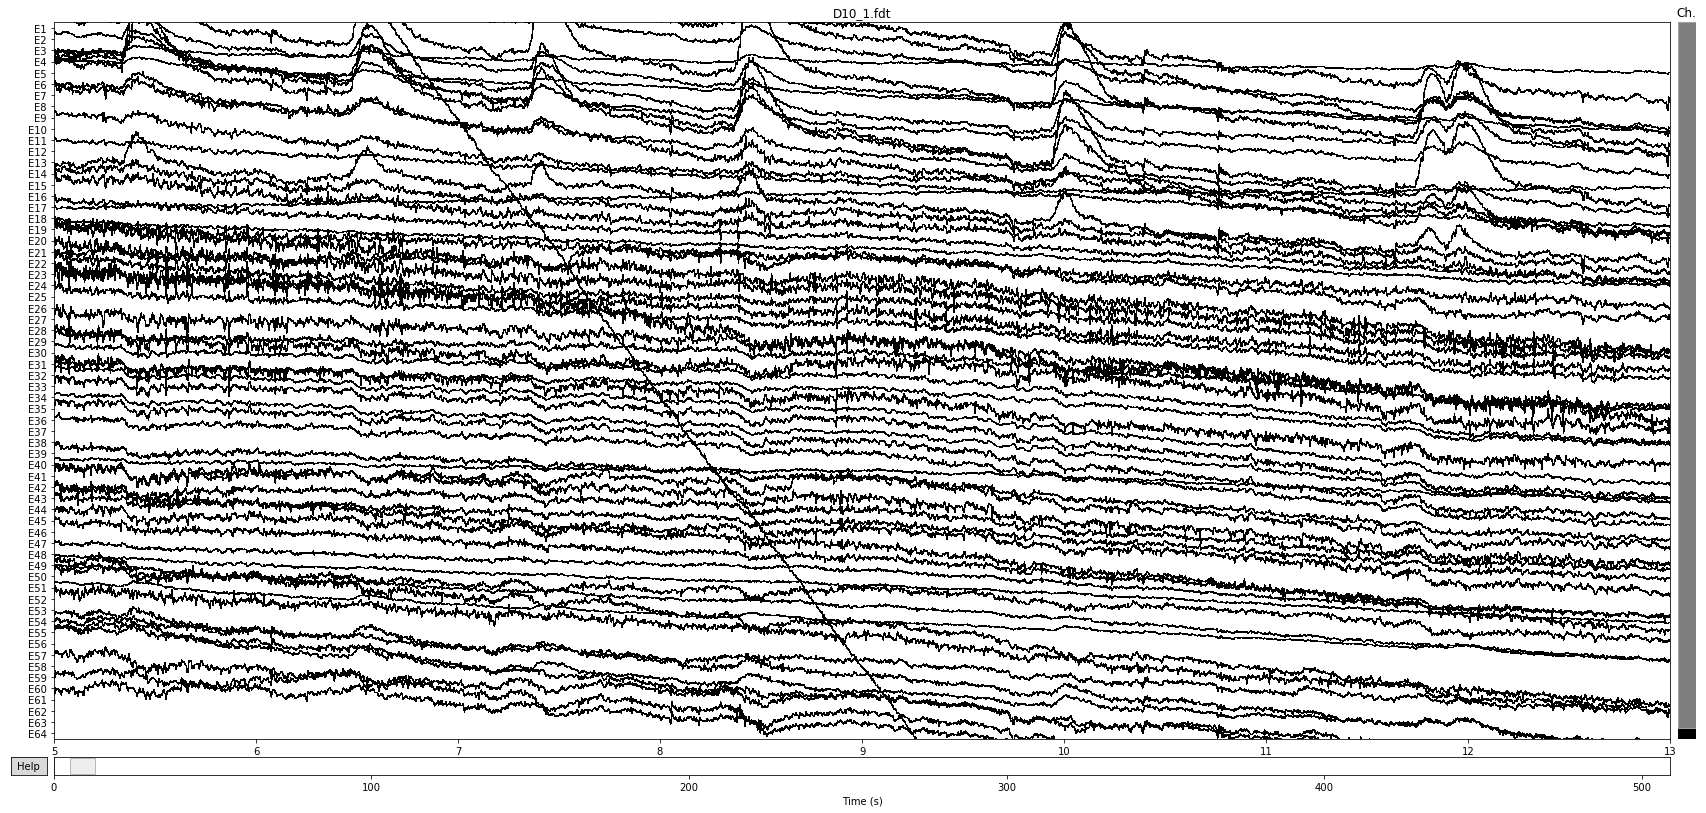

In [30]:
raw.plot(start=5, duration=8, n_channels=64);

Zwróćcie uwagę na powolne zmiany w sygnale - to niskie częstotliwości, które będziemy chcieli usunąć.
Filtrowanie, jak widzieliście w części teoretycznej, to niby prosta operacja, ale faktycznie procedura co do której wciąż toczą się dyskusje. W części praktycznej zajmiemy się tylko podstawami filtrowania.
Bardziej dokładny tutorial na temat filtrowania znajdziecie [tutaj](http://mne-tools.github.io/dev/auto_tutorials/plot_background_filtering.html).
Skorzystamy z metody `filter`, której dokumentacja jest [tu](http://martinos.org/mne/dev/generated/mne.io.Raw.html#mne.io.Raw.filter). Podajemy tej metodzie poniżej dwa argumenty (można podać ich więcej, zobaczcie dokumentację): dolną krawędź filtrowania (tutaj `0.1` czyli chcemy odfiltrować częstotliwości poniżej `0.1`), górną krawędź filtrowania (tutaj `None` czyli nie chcemy odfiltrowywać wysokich częstotliwości):
```python
raw.filter(0.1, None)
```
tego typu operacja jest ok, ale zmieni nam dane w zmiennej `raw` (to tak zwana operacja *in-place*, o których więcej jeszcze sobie powiemy), a chcielibyśmy przefiltrować oryginalne dane na kilka sposobów i porównać jak wyglądają. Dlatego nie chcemy zmieniać oryginalnych danych, filtrowanie będziemy w związku z tym przeprowadzać na kopii. Kopię tworzymy korzystając z metody `copy`:
```python
raw2 = raw.copy()
```

In [31]:
raw2 = raw.copy()
raw2.filter(0.1, None)

Setting up high-pass filter at 0.1 Hz
l_trans_bandwidth chosen to be 0.1 Hz
Filter length of 16500 samples (66.000 sec) selected


<RawEEGLAB  |  D10_1.fdt, n_channels x n_times : 65 x 127237 (508.9 sec), ~63.2 MB, data loaded>

Zobaczcie jak zmienia się sygnał po filtrowaniu:

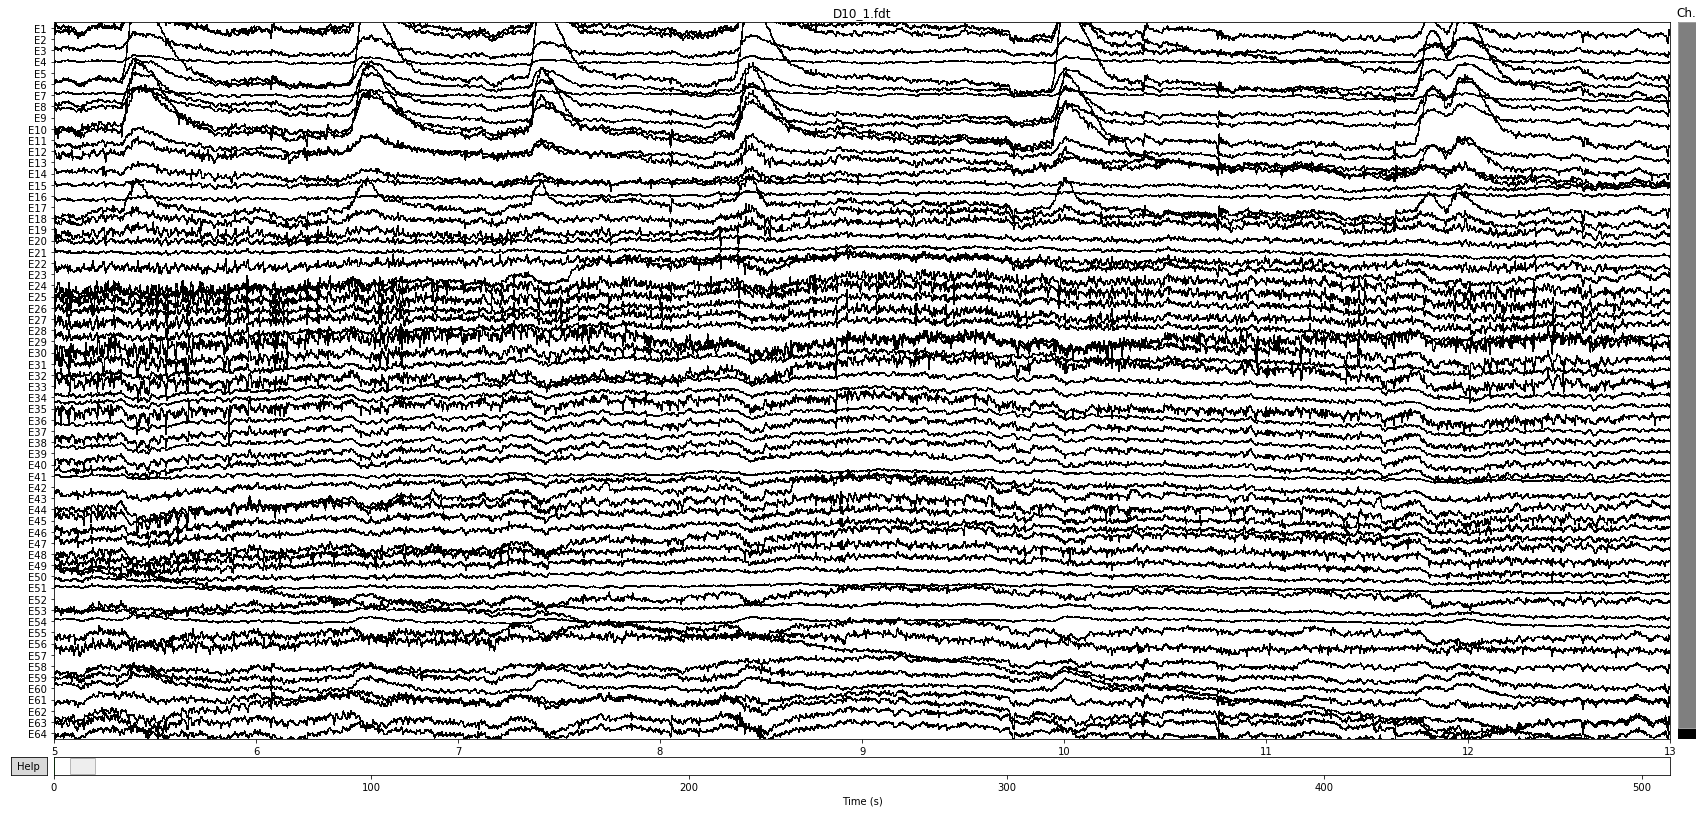

In [32]:
raw2.plot(start=5, duration=8, n_channels=64);

Już mniej pływa, ale cały czas widzimy wolne zmiany - gdybyśmy użyli filtru `0.5` albo `1` Hz zredukowalibyśmy te wolne zmiany bardziej. Do analiz takich jak ICA będziemy używać filtru `1 Hz`. Sprawdźmy jeszcze filtrowanie 1 Hz (zauważcie przy okazji, że mogę komendy `.copy()` oraz `.filter()` połączyć w jeden łańcuch - na skopiowanych danych od razu wykonywane jest filtrowanie):

In [33]:
raw3 = raw.copy().filter(1, None)

Setting up high-pass filter at 1 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 1650 samples (6.600 sec) selected


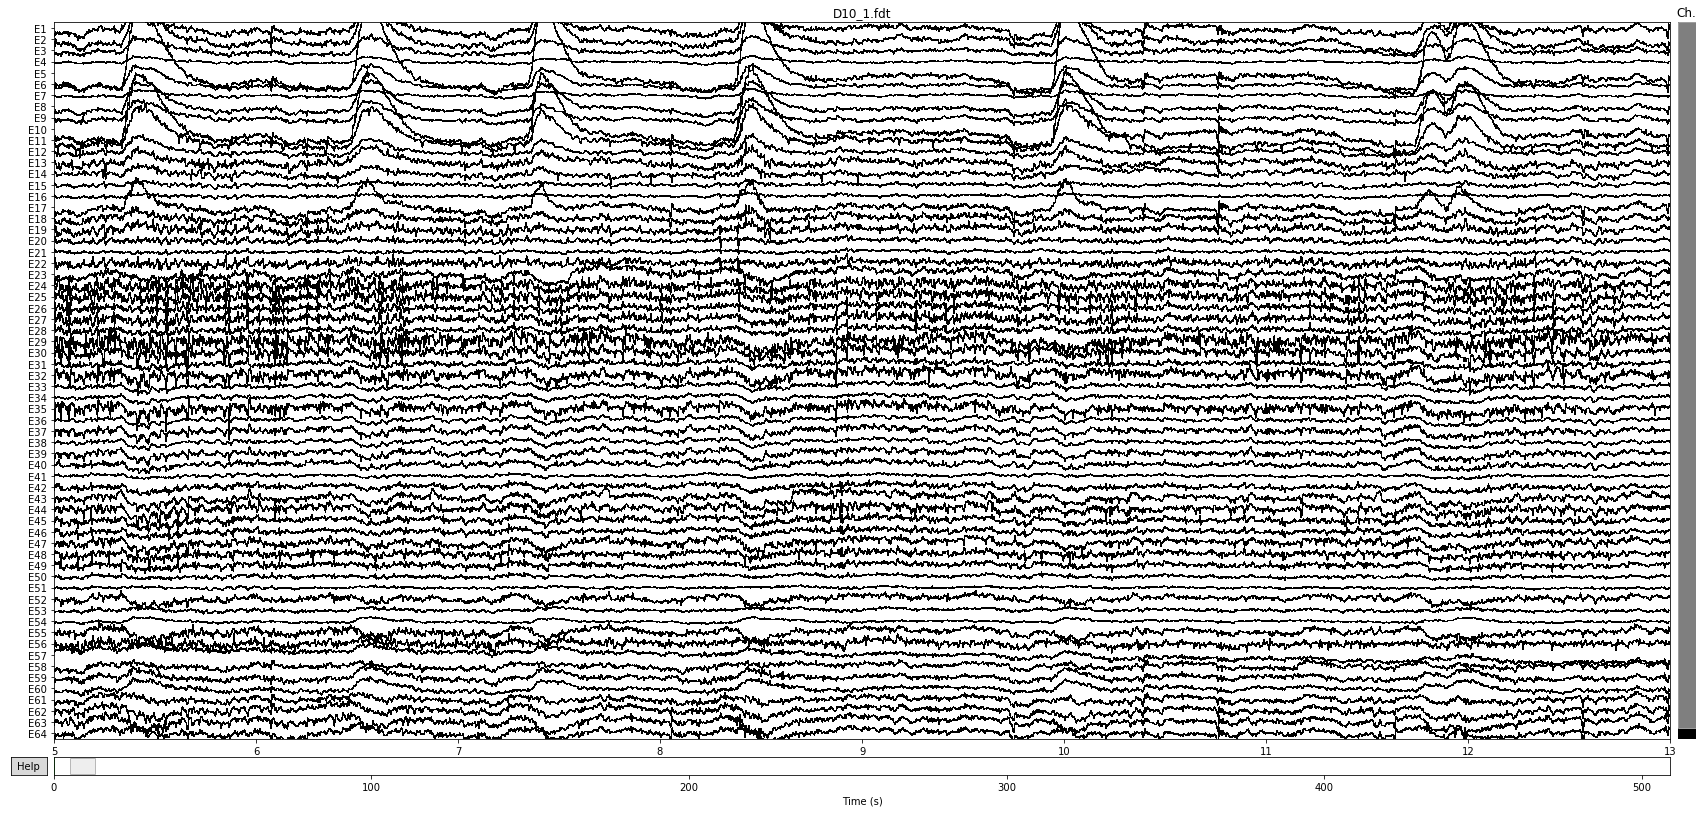

In [35]:
raw3.plot(start=5, duration=8, n_channels=64);

Teraz włączymy tryb interaktywny, wasze zadanie będzie polegało teraz na znalezieniu i oznaczeniu artefaktów:
* oznaczcie złe elektrody
* oznaczcie jako 'mruganie' kilka mrugnięć (nie więcej niż 4-5, mrugania i tak będzimy usuwać przez ICA)
* oznaczcie jako 
* oznaczcie jako `'BAD myog'` (od *myogenic artifact*) wszystkie artefakty mięśniowe (nazwa z 'BAD' sprawia że później tego rodzaju odcinki będą usuwane)
* jako `'BAD'` oznaczcie inne fragmenty, które wydają się Wam artefaktami

Chcemy jeszcze wczytać pozycję kanałów, w mne nazywamy to montażem. Korzystamy z:
* `montage = mne.channels.read_montage(typ_montażu)` - aby wczytać dany montaż
* `raw.set_montage(motange)` - aby zastosować do danych wybrany montaż